Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## 1. Загрузка данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv('/datasets/insurance.csv')

In [3]:
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
Пол                  5000 non-null int64
Возраст              5000 non-null float64
Зарплата             5000 non-null float64
Члены семьи          5000 non-null int64
Страховые выплаты    5000 non-null int64
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


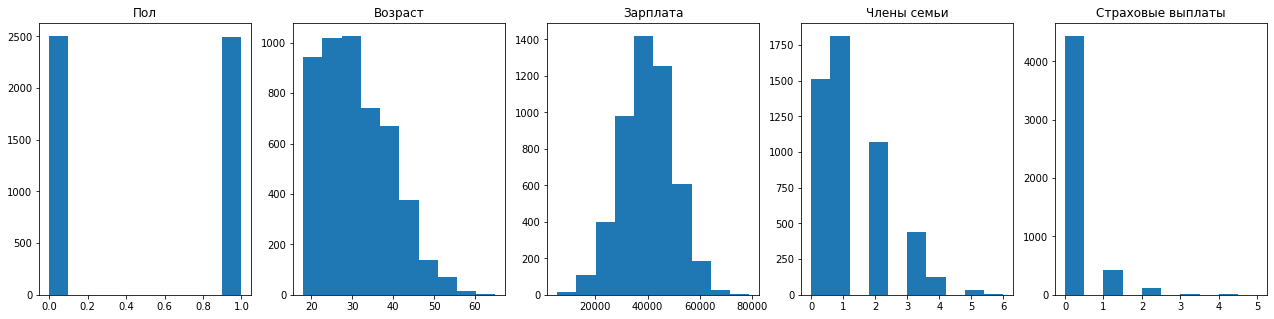

In [5]:
fig, ax = plt.subplots(1,5, figsize=(22,5))
columns = data.columns.to_list()
for column in columns:
    ax[columns.index(column)].set_title(column)
    ax[columns.index(column)].hist(data[column]);

In [6]:
data.duplicated().sum()

153

In [7]:
data.drop_duplicates(inplace = True)

## 2. Умножение матриц

### Ответ на вопрос и обоснование решения.
Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)?

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Предсказания с обратимой матрицей P:

$$
a^{'} = X^{'}w^{'}
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

---

$$w'=((XP)^TXP)^{-1}(XP)^Ty$$

$$a'=XP((XP)^TXP)^{-1}(XP)^Ty$$

$$a'=XP(P^TX^TXP)^{-1}P^TX^Ty$$

$$a'=XPP^{-1}(P^T)^{-1}(X^TX)^{-1}P^TX^Ty$$

$$a'=XPP^{-1}(P^T)^{-1}P^T(X^TX)^{-1}X^Ty$$

$$a'=XPP^{-1}E(X^TX)^{-1}X^Ty$$

$$a'=XPP^{-1}(X^TX)^{-1}X^Ty$$

$$a'=XPP^{-1}w$$

**Ответ:** Не изменится.

**Обоснование:** 

1)По свойству обратимых матриц: $(A^{T})^{{-1}}=(A^{{-1}})^{T}$ 

$$
w = (X^{-1} X)^T X^T y
$$

2) Дважды транспонированная матрица А равна исходной матрице А.

$$w = X y$$ 

$$w^{'} = X P y$$

3)

$$Xy = X P y$$

4)
$$
 w  = P w^ {'}
$$

5)
$$
 w ^ {'} = (P)^{-1} w
$$

## 3. Алгоритм преобразования

**Алгоритм**

$$
 w  = P w^ {'}
$$

$$
 w ^ {'} = (P)^{-1} w
$$

**Обоснование**

Согласно п.2 после упрощения выражения w и подстановки в a параметры исходной и преобразованной модели одинаковы, следовательно - качество линейной регрессии не поменяется. Смысл MSE заключается в нахождении таких параметров, при которых сумма квадратов отклонений будет минимальной.

## 4. Проверка алгоритма

In [8]:
features = data.drop('Страховые выплаты', axis = 1)
target = data['Страховые выплаты']

In [9]:
features_train, features_test, target_train, target_test = train_test_split(features, target, 
                                                        test_size=0.2, random_state=12345)

Создаем рандомно матрицу, проверяем ее на обратимость и умножаем на наши признаки.

In [14]:
try:
    m = np.random.normal(3, 6.5, size=(4, 4))
    np.linalg.inv(m)
except np.linalg.LinAlgError:
    print('Матрица необратимая!!!')
else:
    print('Матрица обратимая...')
    new_feat = features_train.dot(m)
    new_test = features_test.dot(m)

Матрица обратимая...


In [11]:
model = LinearRegression()

model.fit(features_train, target_train)
prediction = model.predict(features_test)
r2_score(target_test, prediction)

0.41605492161510915

In [12]:
model_perf = LinearRegression()

model_perf.fit(new_feat, target_train)
prediction_perf = model_perf.predict(new_test)
r2_score(target_test, prediction_perf)

0.4160549216159096

Качество до и после преобразований  существенно не отличается 

Исходные данные

In [13]:
features_train.head()

,Пол,Возраст,Зарплата,Члены семьи
640,0,28.0,29600.0,0
4510,0,26.0,57100.0,1
1623,1,38.0,41700.0,1
3460,1,23.0,34000.0,1
1820,0,45.0,35100.0,2


После преобразований

In [14]:
new_feat.head()

,0,1,2,3
640,197499.503589,125897.849612,297080.869474,63509.765951
4510,381040.531525,242741.033819,572979.609678,122463.738946
1623,278252.567255,177344.335532,418531.291929,89480.031299
3460,226888.143730,144560.724201,341218.608695,72945.138656
1820,234196.995200,149337.031019,352347.792455,75331.547746


Восстановленные данные

In [15]:
data_perf = new_feat.dot(np.linalg.inv(m)).round().astype('Int64')
data_perf.columns = (['Пол','Возраст','Зарплата','Члены семьи'])
data_perf.head()

,Пол,Возраст,Зарплата,Члены семьи
640,0,28,29600,0
4510,0,26,57100,1
1623,1,38,41700,1
3460,1,23,34000,1
1820,0,45,35100,2


Данные после восстановления соответствуют исходным.

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные загружены
- [x]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [x]  Указан правильный вариант ответа
    - [x]  Вариант обоснован
- [x]  Выполнен шаг 3: предложен алгоритм преобразования
    - [x]  Алгоритм описан
    - [x]  Алгоритм обоснован
- [x]  Выполнен шаг 4: алгоритм проверен
    - [x]  Алгоритм реализован
    - [x]  Проведено сравнение качества моделей до и после преобразования